In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import os
import re

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
# Mount google drive to list the raw data files

# Mounting the drive is straightforward but requires authentication each 
# time we reset the session
drive.mount('/content/drive')
drive_path = '/content/drive/Shareddrives/Capstone_Vacancy/data/'
# ! ls /content/drive/Shareddrives/Capstone_Vacancy/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
securityEvents = pd.read_pickle(drive_path + 'cleaned/' + 'securityEvents.pkl')
securityDailyAll = pd.read_pickle(drive_path + 'cleaned/' + 'securityDailyAll.pkl')
securityDailyUnique = pd.read_pickle(drive_path + 'cleaned/' + 'securityDailyUnique.pkl')
securityHourlyUnique = pd.read_pickle(drive_path + 'cleaned/' + 'securityHourlyUnique.pkl')

# Security Events

This is the unprocessed list of security card scans.  

There are several event types that should be used for filtering. For example, if access is not granted at an internal reader, it still indicates that a person is in the building. Access not granted at an external reader should not count as an additional occupant, although likely often results in a person being admitted.  

The timestamps can be used as actual times tamps of card scans. Rollup should be performed via `count` aggregation.

In [ ]:
securityEvents.head()

,Reader,Event,Floor,Room,Type
2020-05-01 13:11:13+00:00,2 230W Int,Access Granted,2,230W,Int
2020-05-01 07:04:37+00:00,2 265 Int,Access Granted,2,265,Int
2020-05-01 07:04:26+00:00,2 285 Ext,Access Granted,2,285,Ext
2020-05-01 10:46:15+00:00,3 393 Ext,Access Granted,3,393,Ext
2020-05-01 12:01:24+00:00,1 192 Ext,Access Granted,1,192,Ext


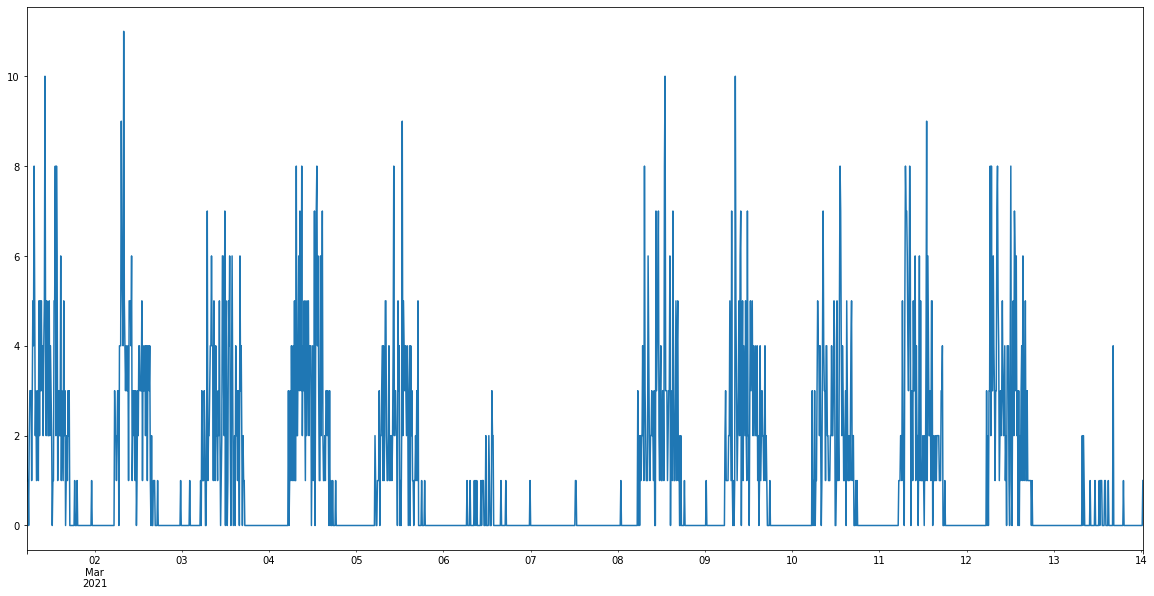

In [ ]:
securityEvents['2021-03-01':'2021-03-14']["Type"].resample('10min').count().plot()

# Security daily totals

```
- count:      daily total card scans - whole building inside and out.  
- countExt:   daily total exterior card scans. 
- countInt:   daily total interior card scans. 
- unique:     daily total unique cards scanned. 
- uniqueExt:  daily total unique cards exterior card scans. 
- uniqueInt:  daily total unique cards interior card scans.
```



In [ ]:
securityDailyAll.head()

,count,countExt,countInt,unique,uniqueExt,uniqueInt
Date,,,,,,
2020-05-01 00:00:00+00:00,52.0,31.0,21.0,20.0,18.0,8.0
2020-05-02 00:00:00+00:00,8.0,4.0,4.0,3.0,3.0,2.0
2020-05-03 00:00:00+00:00,1.0,1.0,0.0,1.0,1.0,0.0
2020-05-04 00:00:00+00:00,50.0,33.0,17.0,13.0,13.0,5.0
2020-05-05 00:00:00+00:00,117.0,72.0,45.0,25.0,25.0,16.0


# Security daily total unique scans per floor and int/ext

```
All:	  daily total unique cards scanned - whole building 
Ext:	  daily total unique exterior cards scanned
Int:	  daily total unique interior cards scanned
1_Ext:	daily total unique exterior cards scanned, 1st floor
2_Ext:	daily total unique exterior cards scanned, 2nd floor
3_Ext:	daily total unique exterior cards scanned, 3rd floor
1_Int:	daily total unique interior cards scanned, 1st floor	
2_Int:	daily total unique interior cards scanned, 2nd floor	
3_Int:	daily total unique interior cards scanned, 3rd floor	
```



In [ ]:
securityDailyUnique.head()

,All,Ext,Int,1_Ext,2_Ext,3_Ext,1_Int,2_Int,3_Int
2020-05-01 00:00:00+00:00,20,18,8,12,5,2,4,4,0
2020-05-02 00:00:00+00:00,3,3,2,3,0,0,1,2,1
2020-05-03 00:00:00+00:00,1,1,0,1,0,0,0,0,0
2020-05-04 00:00:00+00:00,13,13,5,12,1,0,4,1,2
2020-05-05 00:00:00+00:00,25,25,16,23,4,1,13,5,2


# Security hourly total unique scans per floor and int/ext

```
All:	  hourly total unique cards scanned - whole building 
Ext:	  hourly total unique exterior cards scanned
Int:	  hourly total unique interior cards scanned
1_Ext:	hourly total unique exterior cards scanned, 1st floor
2_Ext:	hourly total unique exterior cards scanned, 2nd floor
3_Ext:	hourly total unique exterior cards scanned, 3rd floor
1_Int:	hourly total unique interior cards scanned, 1st floor	
2_Int:	hourly total unique interior cards scanned, 2nd floor	
3_Int:	hourly total unique interior cards scanned, 3rd floor	
```



In [ ]:
securityHourlyUnique.head()

,All,Ext,Int,1_Ext,2_Ext,3_Ext,1_Int,2_Int,3_Int
2020-05-01 06:00:00+00:00,5,5,0,2,3,0,0,0,0
2020-05-01 07:00:00+00:00,2,2,1,0,2,0,0,1,0
2020-05-01 08:00:00+00:00,1,0,1,0,0,0,1,0,0
2020-05-01 09:00:00+00:00,2,2,0,1,1,0,0,0,0
2020-05-01 10:00:00+00:00,3,2,1,0,1,1,1,0,0
